In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import re
%matplotlib inline
sns.set()

Now that we have done some EDA, we will now try to do some data preprocessing in order to allow us better train our ML algo with the data.

We will base our findings on EDA Titanic Boon to impute any missing data 

We will perform imputations on both training and test data set

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Now, we will extract the survived labels from train data and save them. 

In order to ensure our data preprocessing applies to both training and test data set, we will concatenate both training and test data set

In order to preserve the originality of training and test data set we will make copies of both data sets and do preprocessing on the copies instead

In [5]:
#  make copies of both training and test object for us to work on
df_train_copy = df_train.copy()
df_test_copy = df_test.copy()

In [6]:
# make copy of Survived column of training set
train_survived = df_train.Survived

In [7]:
df_train_copy.drop(['Survived'], axis=1, inplace=True)

now that we removed the Survived column for training set, we can concatenate this with test set for preprocessing

In [8]:
df_trainTest_concat = pd.concat([df_train_copy, df_test_copy])

In [9]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1046 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


now we see 1309 rows which means we have successfully concatenated both training (819 rows) and test (418 rows) set

##### we see that there are missing data in Age , Fare, Cabin and Embarked. We will need to inspect these rows again and impute the values accordingly

## Age

In [10]:
# check how many missing Age values
df_trainTest_concat.Age.isnull().sum()

263

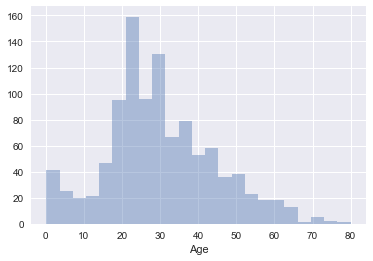

In [11]:
# since we cannot plot rows where Age values are missing,
# we need to extract the rows where Age is not null and plot a distribution plot
df_trainTest_concat_Age_not_null = df_trainTest_concat[df_trainTest_concat['Age'].isnull() == False]

sns.distplot(a=df_trainTest_concat_Age_not_null.Age, kde=False)


In [12]:
print(df_trainTest_concat_Age_not_null[df_trainTest_concat_Age_not_null.Age == 24].info())
print('=============')
print(df_trainTest_concat_Age_not_null.Age.describe())
print('')
print('mode : ', df_trainTest_concat_Age_not_null.Age.mode())
print('median : ', df_trainTest_concat_Age_not_null.Age.median())
# print(' # of median : ', df_trainTest_concat_Age_not_null[df_trainTest_concat_Age_not_null['Age'] == 28].Age.sum())
print(df_trainTest_concat_Age_not_null[df_trainTest_concat_Age_not_null.Age == 28].Age.count())
print('mean : ', df_trainTest_concat_Age_not_null.Age.mean())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 89 to 396
Data columns (total 11 columns):
PassengerId    47 non-null int64
Pclass         47 non-null int64
Name           47 non-null object
Sex            47 non-null object
Age            47 non-null float64
SibSp          47 non-null int64
Parch          47 non-null int64
Ticket         47 non-null object
Fare           47 non-null float64
Cabin          11 non-null object
Embarked       47 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 4.4+ KB
None
count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

mode :  0    24.0
dtype: float64
median :  28.0
32
mean :  29.881137667304014


now, by viewing the age distribution and other parameters such as median and mean, we see that mean is around 29 years old

we would like to ensure that when we impute the missing age values, we do not change our age distribution by too much

we also want to make sure that the mean is also not changed drastically when we impute the missing values

Therefore, for this purpose, we will simply impute the missing values with the median since this is closer to the mean and to simplify our data preprocessing exercise

In [13]:
# impute all missing values with median value
df_trainTest_concat.Age.fillna(value=28, inplace=True)

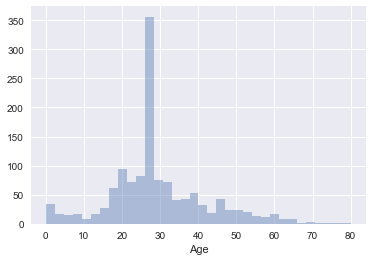

In [14]:
# check our Age distribution again
sns.distplot(a=df_trainTest_concat.Age, kde=False)

In [15]:
df_trainTest_concat.Age.mean()

29.50318563789152

we see that the mean did not change by much after imputation. 

However, we can see that the distribution has not shifted much anywhere although we see a very tall graph which represent all those who were imputed with age 28 (28 is now the mode with the number of missing value rows plus those who were actually 28)

Although some might argue that the data has changed the distribution. This is still acceptable seeing that the mean of the distribution did not change by much.

# FARE

In [16]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1308 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


In [17]:
print(df_trainTest_concat.Fare.isnull().sum())
print(df_train.Fare.isnull().sum())

1
0


we see that there is one missing value for Fare and this did not come from training set. So this must be from the test set!!

since there is onely 1 missing value. let's check out the missing value 

In [18]:
df_trainTest_concat[df_trainTest_concat.Fare.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


Look like this passenger is in pclass 3. 

we can look at the fare distribution for Pclass 3 and impute the missing value with its average 

In [19]:
df_trainTest_concat.groupby(['Pclass']).Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,323.0,87.508992,80.447178,0.0,30.6958,60.0000,107.6625,512.3292
2,277.0,21.179196,13.607122,0.0,13.0000,15.0458,26.0000,73.5000
3,708.0,13.302889,11.494358,0.0,7.7500,8.0500,15.2458,69.5500


now we see that those who are in Pclass 3 paid lower fares on average. 
let's view the distribution

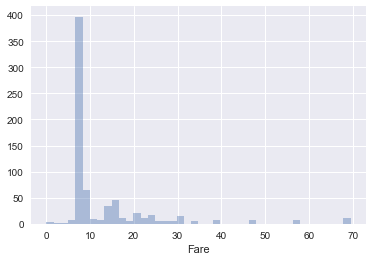

In [20]:
# we want rows where Pclass = 3 and is not null !!
df_pclass3 = df_trainTest_concat.loc[(df_trainTest_concat.Pclass == 3) & (df_trainTest_concat.Fare.isnull() == False)]
sns.distplot(a=df_pclass3.Fare, kde=False)

now we impute the missing fare value with the average of those in Pclass 3 as opposed to just the average of all fares

the average is 13.302889 but we will limit the fare to 2 decimal places since it is unlikely that a passenger will pay anything beyond 2 decimal places

In [21]:
pclass3_ave_fare = round(df_pclass3.Fare.mean(), 2)
df_trainTest_concat.Fare.fillna(value=pclass3_ave_fare, inplace=True)

In [22]:
# passenger with missing fare now has fare = 13.3 
df_trainTest_concat[df_trainTest_concat.PassengerId == 1044]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,13.3,NaN,S


# Cabin

In [23]:
df_trainTest_concat.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64

now we see that there are 1014 rows with missing Cabin values. 

Now as per the data analysis in EDA Titanic Boon, we see that there are only 204 passengers with cabin values.

This might be an indication that the majority of the passengers do not have a cabin. Therefore, we do not need to impute any of the missing cabin values. 

However, based on the EDA, we have concluded that passengers with cabins have higher survival rates. Therefore, we would have to create new columns to reflect the number of cabins that a passenger has  

In [24]:
# extract the rows with cabins for calculations
df_rows_with_cabins = df_trainTest_concat[df_trainTest_concat.Cabin.isnull() == False][['PassengerId', 'Cabin']]
df_rows_with_cabins.head()

,PassengerId,Cabin
1,2,C85
3,4,C123
6,7,E46
10,11,G6
11,12,C103


In [25]:
df_rows_with_cabins['Cabin'] = df_rows_with_cabins.Cabin.str.split(' ', n=0).apply(lambda x: len(x))

now that we have imputed the cabin column with number of cabins, we can now join it with the original dataset on the common PassengerId

In [26]:
df_trainTest_concat = df_trainTest_concat.merge(df_rows_with_cabins, left_on=['PassengerId'], right_on=['PassengerId'], how='outer')

In [27]:
df_trainTest_concat = df_trainTest_concat.drop(['Cabin_x'], axis=1)

now we fill missing values with 0 to indicate that the rest of the passengers do not have a cabin

In [28]:
df_trainTest_concat.Cabin_y.fillna(value=0, inplace=True)

In [29]:
df_trainTest_concat.rename(index=str,columns={'Cabin_y': 'Cabin'}, inplace=True)

#### now that we have actually imputed the number of cabins as a feature. we only have one column left where we still have missing values : Embarked. Let's find out 

# Embarked

In [30]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1307 non-null object
Cabin          1309 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


seems like there are only 2 missing values. let's check them out

In [31]:
df_trainTest_concat[df_trainTest_concat.Embarked.isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
61,62,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,1.0
829,830,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,1.0


In [32]:
df_train.Embarked.isnull().sum()

2

In [33]:
df_test.Embarked.isnull().sum()

0

so now we see that the 2 missing values come from the training set. Also, recall that we did a very assumption that we should impute the Embraked with C instead of S (which is where most passengers embarked) just because they survived abd paid higher fares which is closer to the average fare of Port C

### Therefore, we will impute the missing Port values with C

In [34]:
df_trainTest_concat.Embarked.fillna(value='C', inplace=True)

In [35]:
df_trainTest_concat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 1308
Data columns (total 11 columns):
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Name           1309 non-null object
Sex            1309 non-null object
Age            1309 non-null float64
SibSp          1309 non-null int64
Parch          1309 non-null int64
Ticket         1309 non-null object
Fare           1309 non-null float64
Embarked       1309 non-null object
Cabin          1309 non-null float64
dtypes: float64(3), int64(4), object(4)
memory usage: 122.7+ KB


# Drop irrelevant columns (for now!!)

since we have many columns, there are bound to be a few columns which may not be so relevant to the prediction of whether a passenger survives or not (at least this is what we think for now until we think we can make a relevant connection)

#### in particular, we will drop PassengerId, Name and Ticket Columns as we do not think that these contribute to the survival rate of a passenger at all

In [36]:
# df_trainTest_concat = df_trainTest_concat.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [37]:
df_trainTest_concat.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


much better. Now let's impute the categorical values with numerical values. This is because ML models in scikit learn only take numerical inputs or rather these models work well with numerical inputs

# Imputing categorical inputs with numerical inputs

we will perform one-hot encoding to Sex and Embarked columns

In [38]:
df_trainTest_concat = pd.get_dummies(data=df_trainTest_concat, drop_first=True, columns=['Sex'])

In [39]:
df_trainTest_concat = pd.get_dummies(data=df_trainTest_concat, columns=['Embarked'])

In [40]:
df_trainTest_concat.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0.0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1.0,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0.0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1.0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0.0,1,0,0,1


In [41]:
df_trainTest_concat.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [42]:
df_trainTest_concat.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1,0,0,1
1,1,38.0,1,0,71.2833,1.0,0,1,0,0
2,3,26.0,0,0,7.9250,0.0,0,0,0,1
3,1,35.0,1,0,53.1000,1.0,0,0,0,1
4,3,35.0,0,0,8.0500,0.0,1,0,0,1


# Split concatenated data into training and test data

now that we have preprocessed both training and test data as best as we could, we will split them back into training and test data so as to allow us to train our model using training data and predict using test data

In [43]:
train_data = df_trainTest_concat.iloc[:891].values
test_data = df_trainTest_concat.iloc[891:].values
y = train_survived

remember that this is supervised learning and therefore, we will need to use the Survived column from our training dat to train our ML model !!

# Training ML model

### now, we will begin to train our model. For starters, let's use logistic regression since that is what we are familiar with (we will also be experiementing with other models if we wish later on)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logit_classifier_1 = LogisticRegression(random_state=1)

In [46]:
logit_classifier_1 = logit_classifier_1.fit(X=train_data, y=y)

In [47]:
logit_predictions_1 = logit_classifier_1.predict(test_data)

In [48]:
print(logit_classifier_1.score(train_data, y))

0.802469135802


now we see that our score on our training set is about 80% 

to make a submission to kaggle, we will need to combine passengerId and our predictions into 1 dataframe and submit them to kaggle

In [49]:
df_test['Survived'] = logit_predictions_1

In [50]:
df_test_predictions_1 = df_test[['PassengerId', 'Survived']]

In [51]:
df_test_predictions_1.to_csv('1st_Logit_prediction_Boon.csv', index=False)

# Results

the results from the first submission resulted in an accuracy of just 0.76076. 

Now, in order to improve our accuraccy, we will need to perform some studies to get an intuition as to what is happening to our ML when we train it. 

Is it an underfitting or overfitting problem? 

Is there a better algorithm out there which can help with improving accurracy ?

in order to know if it's an underfitting or overfitting problem, we can conduct some validation curves to determine our case 

1) perform accuracy of training set vs test set (something we don't have a label for)

# Trying out another model

we can also try out another ML model in order to determine the best model for this problem. 

#### We will try the decision tree model next

In [52]:
from sklearn import  tree

decision_Tree_classifier_1 =  tree.DecisionTreeClassifier()

decision_Tree_classifier_1 = decision_Tree_classifier_1.fit(X=train_data, y=y)

In [53]:
decision_tree_prediction_1 = decision_Tree_classifier_1.predict(X=test_data)

In [54]:
print(decision_Tree_classifier_1.score(X=train_data, y=y))

0.983164983165


In [55]:
df_decision_tree_prediction = pd.DataFrame()

In [56]:
df_decision_tree_prediction['PassengerId'] = df_test['PassengerId']
df_decision_tree_prediction['Survived'] = decision_tree_prediction_1

df_decision_tree_prediction.to_csv('decision_tree_prediction_1.csv', index=False)

the predicted result only has an accuraccy of about 74% which is not really an improvement

### Trying out support vector machines

In [57]:
from sklearn.svm import SVC 

In [58]:
support_vector_classifier = SVC()

In [59]:
support_vector_classifier = support_vector_classifier.fit(X=train_data, y=y)

print(support_vector_classifier.score(X=train_data, y=y))

0.882154882155


In [60]:
support_vector_prediction_1 = support_vector_classifier.predict(X=test_data)

In [61]:
df_support_vector_prediction = pd.DataFrame()

In [62]:
df_support_vector_prediction['PassengerId'] = df_test.PassengerId
df_support_vector_prediction['Survived'] = support_vector_prediction_1

In [63]:
df_support_vector_prediction.to_csv('support_vector_prediction_1.csv', index=False)

### Trying out Random Forest Classifier

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
random_forest_classifier_1 = RandomForestClassifier()

In [66]:
random_forest_classifier_1.fit(X=train_data, y=y)

print(random_forest_classifier_1.score(X=train_data, y=y))

0.968574635241


In [67]:
random_forest_prediction_1 = random_forest_classifier_1.predict(X=test_data)

In [68]:
df_random_forest_prediction_1 = pd.DataFrame()
df_random_forest_prediction_1['PassengerId'] = df_test.PassengerId
df_random_forest_prediction_1['Survived'] = random_forest_prediction_1

df_random_forest_prediction_1.to_csv('random_forest_prediction_1.csv', index=False)

# Kaggle results of other ML models

After training other ML models using the training data set, the following kaggle accuracies were obtained

Decision tree : 0.74641

SVM : 0.62679

Random forest : 0.73684

#### Logistic Regression: 0.76076

it seems like the logistic regression model still outperforms all 3 models althought not by much.

It is also worth noting that all our models have only achieved accuraccies in the 0.7-0.8 range. 
This means that there are still room for improvement and we may need to do the following: 

<li>Learning curves</li>
<li>revisit data preprocessing</li>
<li>hyperparamter tuning</li>

First things first, we need to determine if we are suffering from underfitting or overfitting and we need to do this by plotting our error curves for training and test sets. 

Let us take a closer look at our Logistic Regression Classifier first and analyze it's performance

### Logistic Regression Classifier (Revisited)

In [69]:
logit_classifier_1_params = logit_classifier_1.get_params(deep=True)
logit_classifier_1_coeffs = logit_classifier_1.coef_

In [70]:
df_trainTest_concat.head()

,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1,0,0,1
1,1,38.0,1,0,71.2833,1.0,0,1,0,0
2,3,26.0,0,0,7.9250,0.0,0,0,0,1
3,1,35.0,1,0,53.1000,1.0,0,0,0,1
4,3,35.0,0,0,8.0500,0.0,1,0,0,1


in order to learn more about our logit classifier we can construct learning curves to see if we are suffering from underfitting or overfitting

In [71]:
from sklearn.model_selection import learning_curve

In [72]:
train_sizes, train_scores, cross_valid_scores = learning_curve(estimator=logit_classifier_1, 
                                                               X=train_data, y=train_survived,
                                                              cv=5)

mean_train_scores = np.mean(train_scores, axis=1)
mean_CV_scores = np.mean(cross_valid_scores,axis=1)

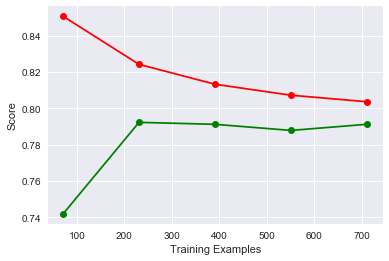

In [73]:
plt.figure()
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes,mean_train_scores,'o-',color='r')
plt.plot(train_sizes,mean_CV_scores,'o-',color='green')
plt.show()

### Remarks: As can be seen from the curve above, we can see that the training and cross validation scores converge as the number of training examples used to train the logit model increases. 

#### 1) The gap between them are not large and we can safely say that our model is unlikely to be suffering from overfitting cause training and cross validation converges

#### 2) However, our logit model is actually suffering from underfitting because as we can see, the converging scores are low and they are not where we would like them to be (in the 90% range)

now that we know that our logit model is suffering from underfitting, it is easier for us to know where we should be headed next in terms of improving our model. Since we are suffering from underfitting, it means that our model has a high bias (hence constantly underfitting our dataset). 

Our model is not flexible enough to capture enough information/pattern in the data to able to make better predictions.

we can do the following: 

- use more flexible model
- do feature engineering to create more useful features

Since we are actually underfitting, it is unlikely that feeding the model with more data will help (something that we don't even have!)

Also, before we proceed to improve our logit model, let's see what other models are suffering from as well

## Learning curves of other ML models

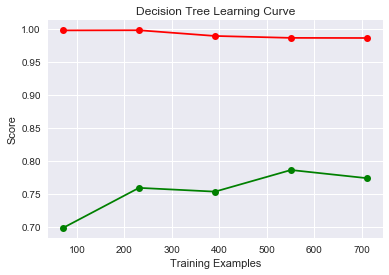

In [77]:
# decision tree classifier
train_sizes, train_scores, cross_valid_scores = learning_curve(estimator=decision_Tree_classifier_1, 
                                                               X=train_data, y=train_survived,
                                                              cv=5)

mean_train_scores = np.mean(train_scores, axis=1)
mean_CV_scores = np.mean(cross_valid_scores,axis=1)


plt.figure()
plt.title('Decision Tree Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes,mean_train_scores,'o-',color='r')
plt.plot(train_sizes,mean_CV_scores,'o-',color='green')
plt.show()

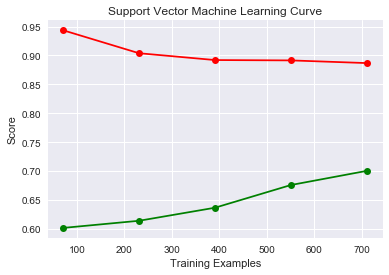

In [79]:
# support vector classifier
train_sizes, train_scores, cross_valid_scores = learning_curve(estimator=support_vector_classifier, 
                                                               X=train_data, y=train_survived,
                                                              cv=5)

mean_train_scores = np.mean(train_scores, axis=1)
mean_CV_scores = np.mean(cross_valid_scores,axis=1)


plt.figure()
plt.title('Support Vector Machine Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes,mean_train_scores,'o-',color='r')
plt.plot(train_sizes,mean_CV_scores,'o-',color='green')
plt.show()

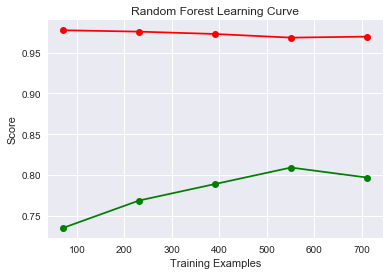

In [81]:
# random forest classifier
train_sizes, train_scores, cross_valid_scores = learning_curve(estimator=random_forest_classifier_1, 
                                                               X=train_data, y=train_survived,
                                                              cv=5)

mean_train_scores = np.mean(train_scores, axis=1)
mean_CV_scores = np.mean(cross_valid_scores,axis=1)


plt.figure()
plt.title('Random Forest Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Score')

plt.plot(train_sizes,mean_train_scores,'o-',color='r')
plt.plot(train_sizes,mean_CV_scores,'o-',color='green')
plt.show()

#### Remarks: It seems that all 3 ML models have an overfitting issue since the score gap between the training and test sets are so large although they all seem to have a converging pattern

However, as we can see the score for the training sets are relatively high for all 3 curves. Our CV on the other hand is increasing in score but has a high score gap 

All the 3 ML models suffer from what we call the overfitting problem where these complex models does very well on the training sets and not on the cross validation sets. 

Bear in mind that these models are also more complex than the Logit model and can capture more information (even noise)

Usually What we can do to improve the model with overfitting problems:
- provide more data (something we don't have!!) ====> usually prefered with larger datasets
- reduce irrelevant features from the data (we risk losing important info!)